In [1]:
import numpy as np
import pandas as pd

In [271]:
## No vpn, just use github stored files

In [2]:
## download the image-predictions.tsv
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'

In [3]:
import requests
import os

file = url.split('/')[-1]
path = './WeRateDogs_data/'
r = requests.get(url, stream=True)

if os.path.isfile(path + file):
    print("File {} exist!".format(file))
    #http://docs.python-requests.org/en/master/user/quickstart/#make-a-request
else:
    with(open(path + file, 'ab')) as fd:
        for chunk in r.iter_content(chunk_size=1024):
            if chunk:
                fd.write(chunk)

File image-predictions.tsv exist!


## Read all seperate files

In [5]:
# file 1
df_tweet = pd.read_json('./WeRateDogs_data/tweet_json.txt', lines=True)

In [6]:
# file 2
df_image = pd.read_csv('./WeRateDogs_data/image-predictions.tsv', delimiter='\t')

In [ ]:
# p1 是对推特中图片算法 #1 的预测 → basset
# p1_conf 是 #1 预测中算法的可信度 → 0.555712
# p1_dog 是 #1 预测是否是狗的品种 → True

In [7]:
# file 3
df = pd.read_csv('./WeRateDogs_data/twitter-archive-enhanced.csv')

In [74]:
df_tweet_clean = df_tweet.copy()
df_image_clean = df_image.copy()
df_clean       = df.copy()

## Data assess and Clean

In [9]:
df_tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2352 non-null datetime64[ns]
display_text_range               2352 non-null object
entities                         2352 non-null object
extended_entities                2073 non-null object
favorite_count                   2352 non-null int64
favorited                        2352 non-null bool
full_text                        2352 non-null object
geo                              0 non-null float64
id                               2352 non-null int64
id_str                           2352 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [10]:
## find duplicated ID

In [11]:
df_clean.duplicated('tweet_id').value_counts()

False    2356
dtype: int64

In [12]:
df_tweet_clean.duplicated('id').value_counts()

False    2352
dtype: int64

In [13]:
df_image_clean.duplicated('tweet_id').value_counts()

False    2075
dtype: int64

In [14]:
## test id connection
df_clean[df_clean['tweet_id'] == int(df_tweet_clean['id'].sample().values)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1445,696518437233913856,NaN,NaN,2016-02-08 02:18:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh my god 10/10 for every little hot dog pupper,NaN,NaN,NaN,NaN,10,10,None,None,None,pupper,None


In [20]:
df_image_clean[df_image_clean['tweet_id'] == int(df_tweet_clean['id'].sample().values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [15]:
df_image_clean[df_image_clean['tweet_id'] == int(df_tweet_clean['id'].sample().values)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog



1. ID no duplicated issue
2. ID counts in 3 files are not identical
3. ID can connect all three files *most of time*

收集上述数据的每个内容后，从视觉上和程序上，对质量和清洁度进行数据评估。关键要点：

- 我们只需要含有图片的原始评级 (不包括转发)。
- 充分评估和清洗整个数据集需要巨大努力，所以只有一些问题 (至少 8 个质量问题和 2 个清洁度问题) 的子集需要进行评估和清洗。
- 根据清洗数据的规则，清洗包括合并数据的独立内容。
- 如果分子评级超过分母评级，不需要进行清洗。这个 特殊评级系统 是 WeRateDogs 人气度较高的主要原因。



In [ ]:
## File 1 - df_tweet_clean

In [75]:
df_tweet_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39492,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8842,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33786,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6480,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25445,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4301,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42863,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8925,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41016,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9721,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [178]:
## if not null, need be drop out

## 我们只需要含有图片的原始评级 (不包括转发)
## https://discussions.youdaxue.com/t/topic/56305/2

In [76]:
df_tweet_clean.retweeted_status.count()

177

In [77]:
df_tweet_clean['retweeted_status'].sample().tolist()

[nan]

In [78]:
df_tweet_clean[~df_tweet_clean.retweeted_status.isnull()].sample(2)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
179,NaN,NaN,2017-04-24 20:17:23,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: This is Luna. It's her first ti...,NaN,...,NaN,NaN,NaN,NaN,11580,False,{'created_at': 'Thu Mar 23 00:18:10 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
306,NaN,NaN,2017-02-25 17:06:32,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: Meet Lola. Her hobbies include ...,NaN,...,NaN,NaN,NaN,NaN,1930,False,{'created_at': 'Fri Feb 24 23:04:14 +0000 2017...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [79]:
df_tweet_clean.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'retweet_count', 'retweeted', 'retweeted_status', 'source', 'truncated',
       'user'],
      dtype='object')

In [80]:
ss = df_tweet_clean.sample()

In [81]:
ss

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
419,NaN,NaN,2017-01-18 20:16:54,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 780601293052190720, 'id_str'...",0,False,RT @dog_rates: Meet Hercules. He can have what...,NaN,...,0.0,NaN,NaN,NaN,3810,False,{'created_at': 'Tue Sep 27 02:53:48 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [82]:
ss.source.tolist()

['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>']

In [83]:
ss.full_text.tolist()

['RT @dog_rates: Meet Hercules. He can have whatever he wants for the rest of eternity. 12/10 would snug passionately https://t.co/mH0IOyFdIG']

In [84]:
#keep_cols = ['id', 'created_at', 'display_text_range', 'favorite_count', 'retweet_count', 'full_text']
keep_cols = ['id', 'favorite_count', 'retweet_count']


df_tweet_clean = df_tweet_clean[keep_cols]
df_tweet_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39492,8842
1,892177421306343426,33786,6480
2,891815181378084864,25445,4301
3,891689557279858688,42863,8925
4,891327558926688256,41016,9721


In [85]:
df_tweet_clean.describe()

,id,favorite_count,retweet_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,8109.198980,3134.932398
std,6.846210e+16,11980.795669,5237.846296
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,1417.000000,618.000000
50%,7.193536e+17,3596.500000,1456.500000
75%,7.991219e+17,10118.000000,3628.750000
max,8.924206e+17,132318.000000,79116.000000


## file1- issue:

1. id not alige with other two file, type should be object

In [86]:
df_tweet_clean['tweet_id'] = df_tweet_clean['id'].astype(str)
df_tweet_clean             = df_tweet_clean.drop('id', axis=1)
df_tweet_clean.head()

,favorite_count,retweet_count,tweet_id
0,39492,8842,892420643555336193
1,33786,6480,892177421306343426
2,25445,4301,891815181378084864
3,42863,8925,891689557279858688
4,41016,9721,891327558926688256


## file 2

In [87]:
df_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


## file2- issue:

1. id type should be object
2. jpg_url etc are not easy understand

In [88]:
df_image_clean['tweet_id'] = df_image_clean['tweet_id'].astype('str')

In [89]:
df_image_clean = df_image_clean.rename(columns={'jpg_url': 'image_url',
                                                'p1': 'Frist_prediction',
                                                'p1_conf': 'Frist_pred_conf',
                                                'p2': 'Second_prediction',
                                                'p2_conf': 'Second_pred_conf',
                                                'p3': 'Third_prediction',
                                                'p3_conf': 'Third_pred_conf',
                                                'p1_dog': 'is_dog_pred_Frist',
                                                'p2_dog': 'is_dog_pred_Second',
                                                'p3_dog': 'is_dog_pred_Third',
                                                })

In [90]:
df_image_clean.head()

,tweet_id,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [91]:
df_image_clean['img_num'].value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [93]:
df_image_clean.nlargest(5, 'img_num')[['Frist_pred_conf', 'Second_pred_conf', 'Third_pred_conf']]

,Frist_pred_conf,Second_pred_conf,Third_pred_conf
144,0.708163,0.091372,0.067325
779,0.943331,0.023675,0.007165
1024,0.982004,0.008943,0.007550
1161,0.883991,0.023542,0.016056
1286,0.912648,0.035059,0.026376


In [99]:
df_image_clean.loc[1024, :]

tweet_id                                           710588934686908417
image_url             https://pbs.twimg.com/media/CdyE2x1W8AAe0TG.jpg
img_num                                                             4
Frist_prediction                                             Pembroke
Frist_pred_conf                                              0.982004
is_dog_pred_Frist                                                True
Second_prediction                                            Cardigan
Second_pred_conf                                           0.00894347
is_dog_pred_Second                                               True
Third_prediction                                             malamute
Third_pred_conf                                             0.0075499
is_dog_pred_Third                                                True
Name: 1024, dtype: object

In [100]:
df_image_clean[df_image_clean['img_num'] == 2].sample().image_url

1686    https://pbs.twimg.com/media/C04taUjWIAA6Mo4.jpg
Name: image_url, dtype: object

In [101]:
s2 = df_image_clean[df_image_clean['img_num'] == 4].sample()
s2.image_url

1920    https://pbs.twimg.com/media/C-If9ZwXoAAfDX2.jpg
Name: image_url, dtype: object

In [ ]:
## image_num != url_num

##  Merge files 1 and 2 

In [102]:
# Frist, make indexs aligements

# get id list
id_list = df_tweet_clean[df_tweet_clean.tweet_id.isin(df_image_clean.tweet_id)].tweet_id

In [103]:
len(id_list)

2073

In [104]:
df_tweet_clean2 = df_tweet_clean[df_tweet_clean.tweet_id.isin(id_list)]
df_image_clean2 = df_image_clean[df_image_clean.tweet_id.isin(id_list)]

In [105]:
df_image_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id              2073 non-null object
image_url             2073 non-null object
img_num               2073 non-null int64
Frist_prediction      2073 non-null object
Frist_pred_conf       2073 non-null float64
is_dog_pred_Frist     2073 non-null bool
Second_prediction     2073 non-null object
Second_pred_conf      2073 non-null float64
is_dog_pred_Second    2073 non-null bool
Third_prediction      2073 non-null object
Third_pred_conf       2073 non-null float64
is_dog_pred_Third     2073 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 168.0+ KB


In [106]:
df_tweet_clean2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2351
Data columns (total 3 columns):
favorite_count    2073 non-null int64
retweet_count     2073 non-null int64
tweet_id          2073 non-null object
dtypes: int64(2), object(1)
memory usage: 64.8+ KB


In [47]:
df.merge?

In [107]:
df_image_tweet = pd.merge(df_tweet_clean2, df_image_clean2, on='tweet_id', how='left')

In [108]:
df_image_tweet.head()

,favorite_count,retweet_count,tweet_id,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,39492,8842,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,33786,6480,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,25445,4301,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,42863,8925,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,41016,9721,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## File 3

In [109]:
df_clean.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,None,None,None,None
1149,726828223124897792,NaN,NaN,2016-05-01 17:38:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bloop. He's a Phoenician Winnebago. To...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/726828223...,12,10,Bloop,None,None,None,None
2026,671879137494245376,NaN,NaN,2015-12-02 02:30:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Brad. He's a chubby lil pup. Doesn't r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671879137...,5,10,Brad,None,None,None,None


In [110]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [111]:
df_clean[df_clean['puppo'] == None] 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [ ]:
# all type enter is None, drop out, similar operate for doggo ...

In [112]:
df_clean.source.sample()

1747    <a href="http://twitter.com/download/iphone" r...
Name: source, dtype: object

In [113]:
df_clean.text.sample().tolist()

['Nothin better than a doggo and a sunset. 11/10 https://t.co/JlFqOhrHEs']

In [62]:
df_clean.expanded_urls.sample().tolist()

['https://twitter.com/dog_rates/status/867421006826221569/photo/1']

In [114]:
df_clean2 = df_clean.drop(['in_reply_to_status_id',
                           'in_reply_to_user_id', 
                           'source',
                           'retweeted_status_id',
                           'retweeted_status_user_id',
                           'retweeted_status_timestamp',
                           'expanded_urls',
                           'doggo',
                           'floofer',
                           'pupper',
                           'puppo'], axis=1)

In [115]:
df_clean2.head()

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin


## File 3 issue:
1. timestamp can convert seperate cols;
2. get type from text
3. clean rating_numerator not > rating_denominator

In [116]:
# get type from text

df_clean2['type'] = 'Unkown'

#dog_lists = ['pupper', 'puppo', 'doggo', 'floofer']
dog_lists = ['pupper', 'puppo', 'doggo', 'floofer', 'blep', 'snoot'] # ref doc provide two more types

for i in range(len(df_clean2)):
    text = df_clean2.loc[i, 'text']
    for dog_status in dog_lists:
        if dog_status in text:
            #df_clean.type[i] = dog_status
            df_clean2.loc[i, 'type'] = dog_status

In [117]:
df_clean2.sample(5)

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,type
1880,675006312288268288,2015-12-10 17:37:00 +0000,Say hello to Mollie. This pic was taken after ...,10,10,Mollie,pupper
2151,669682095984410625,2015-11-26 01:00:28 +0000,Meet Louie. He just pounded that bottle of win...,9,10,Louie,Unkown
2248,667866724293877760,2015-11-21 00:46:50 +0000,This is Shaggy. He knows exactly how to solve ...,10,10,Shaggy,Unkown
1848,675798442703122432,2015-12-12 22:04:39 +0000,This is Bernie. He just touched a boob for the...,10,10,Bernie,Unkown
1966,673343217010679808,2015-12-06 03:28:27 +0000,IT'S SO SMALL ERMERGERF 11/10 https://t.co/dNU...,11,10,None,Unkown


In [118]:
df_clean2['tweet_id'] = df_clean2['tweet_id'].astype(str)

In [119]:
df_clean2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 7 columns):
tweet_id              2356 non-null object
timestamp             2356 non-null object
text                  2356 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
type                  2356 non-null object
dtypes: int64(2), object(5)
memory usage: 128.9+ KB


In [72]:
## split timestamp

In [120]:
df_clean2['timestamp'] = pd.DatetimeIndex(df_clean2['timestamp'])

In [121]:
t1 = df_clean2['timestamp'].sample()
t1 = pd.DatetimeIndex(t1)

In [122]:
t1.year

Int64Index([2017], dtype='int64', name='timestamp')

In [123]:
temp = pd.DatetimeIndex(df_clean2['timestamp'])

In [124]:
df_clean2['Year']  = temp.year
df_clean2['Month'] = temp.month
df_clean2['Date']  = temp.date

In [125]:
df_clean2['Month'].replace(1, 'January', inplace=True)
df_clean2['Month'].replace(2, 'February', inplace=True)
df_clean2['Month'].replace(3, 'March', inplace=True)
df_clean2['Month'].replace(4, 'April', inplace=True)
df_clean2['Month'].replace(5, 'May', inplace=True)
df_clean2['Month'].replace(6, 'June', inplace=True)
df_clean2['Month'].replace(7, 'July', inplace=True)
df_clean2['Month'].replace(8, 'August', inplace=True)
df_clean2['Month'].replace(9, 'September', inplace=True)
df_clean2['Month'].replace(10, 'October', inplace=True)
df_clean2['Month'].replace(11, 'November', inplace=True)
df_clean2['Month'].replace(12, 'December', inplace=True)

In [126]:
df_clean2['Day_of_Week'] = temp.dayofweek

df_clean2['Day_of_Week'].replace(0, 'Monday', inplace=True)
df_clean2['Day_of_Week'].replace(1, 'Tuesday', inplace=True)
df_clean2['Day_of_Week'].replace(2, 'Wednesday', inplace=True)
df_clean2['Day_of_Week'].replace(3, 'Thursday', inplace=True)
df_clean2['Day_of_Week'].replace(4, 'Friday', inplace=True)
df_clean2['Day_of_Week'].replace(5, 'Saturday', inplace=True)
df_clean2['Day_of_Week'].replace(6, 'Sunday', inplace=True)

In [128]:
df_clean2['Time'] = temp.time
df_clean2['Hour'] = temp.hour

In [129]:
df_clean3 = df_clean2.drop('timestamp', axis=1)

In [130]:
df_clean3.sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
994,748568946752774144,This is Cora. She rings a bell for treats. 12/...,12,10,Cora,Unkown,2016,June,2016-06-30,Thursday,17:28:39,17
1885,674793399141146624,I have found another. 13/10 https://t.co/HwroP...,13,10,None,Unkown,2015,December,2015-12-10,Thursday,03:30:58,3
1162,723688335806480385,This is Reginald. He starts screaming at rando...,12,10,Reginald,Unkown,2016,April,2016-04-23,Saturday,01:41:59,1
487,814153002265309185,This is Oshie. He's ready to party. Bought tha...,12,10,Oshie,Unkown,2016,December,2016-12-28,Wednesday,16:56:16,16
609,797545162159308800,This is Cassie. She steals things. Guilt incre...,12,10,Cassie,Unkown,2016,November,2016-11-12,Saturday,21:02:38,21


### rating_numerator & rating_denominator

In [133]:
df_clean3.rating_numerator.value_counts()[:10]

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [134]:
df_clean3.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

> usual rating_denominator = 10, and rating_numerator > rating_denominator

In [147]:
df_clean3.nlargest(10, 'rating_denominator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
1120,Say hello to this unbelievably well behaved sq...,204,170
902,Why does this never happen at my front door......,165,150
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120
1635,Someone help the girl is being mugged. Several...,121,110
1228,Happy Saturday here's 9 puppers on a bench. 99...,99,90
1254,Here's a brigade of puppers. All look very pre...,80,80
1843,Here we have an entire platoon of puppers. Tot...,88,80
433,The floofs have been released I repeat the flo...,84,70
1202,This is Bluebert. He just saw that both #Final...,50,50


In [149]:
df_clean3.loc[1202, 'text']

'This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq'

In [155]:
df_clean3.loc[1202, 'rating_numerator'] = 11
df_clean3.loc[1202, 'rating_denominator'] = 10

In [156]:
df_clean3.loc[1254, 'text']

"Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12"

In [158]:
df_clean3.nlargest(10, 'rating_numerator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
979,This is Atticus. He's quite simply America af....,1776,10
189,@s8n You tried very hard to portray this good ...,666,10
188,@dhmontgomery We also gave snoop dogg a 420/10...,420,10
2074,After so many requests... here you go.\n\nGood...,420,10
1120,Say hello to this unbelievably well behaved sq...,204,170
290,@markhoppus 182/10,182,10
902,Why does this never happen at my front door......,165,150
1779,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,144,120
1634,"Two sneaky puppers were not initially seen, mo...",143,130
1635,Someone help the girl is being mugged. Several...,121,110


In [159]:
df_clean3.loc[979, 'text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [160]:
df_clean3.loc[189, 'text']

'@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10'

In [162]:
df_clean3.loc[1779, 'text']

"IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"

In [163]:
df_clean3.nsmallest(10, 'rating_numerator')[['text', 'rating_numerator', 'rating_denominator']]

,text,rating_numerator,rating_denominator
315,When you're so blinded by your systematic plag...,0,10
1016,"PUPDATE: can't see any. Even if I could, I cou...",0,10
605,RT @dog_rates: Not familiar with this breed. N...,1,10
1446,After reading the comments I may have overesti...,1,10
1869,What kind of person sends in a picture without...,1,10
1940,The millennials have spoken and we've decided ...,1,10
2038,After 22 minutes of careful deliberation this ...,1,10
2091,Flamboyant pup here. Probably poisonous. Won't...,1,10
2261,Never seen dog like this. Breathes heavy. Tilt...,1,10
2338,Not familiar with this breed. No tail (weird)....,1,10


In [164]:
df_clean3.loc[315, 'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [166]:
df_clean3.loc[2038, 'text']

'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes'

In [167]:
df_clean3.loc[2091, 'text']

"Flamboyant pup here. Probably poisonous. Won't eat kibble. Doesn't bark. Slow af. Petting doesn't look fun. 1/10 https://t.co/jxukeh2BeO"

In [169]:
df_clean3[df_clean3.rating_denominator != 10].sample(5)

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,24,7,Sam,Unkown,2016,December,2016-12-19,Monday,23:06:23,23
1351,704054845121142784,Here is a whole flock of puppers. 60/50 I'll ...,60,50,a,pupper,2016,February,2016-02-28,Sunday,21:25:30,21
784,775096608509886464,"RT @dog_rates: After so many requests, this is...",9,11,None,Unkown,2016,September,2016-09-11,Sunday,22:20:06,22
902,758467244762497024,Why does this never happen at my front door......,165,150,None,Unkown,2016,July,2016-07-28,Thursday,01:00:57,1
1635,684222868335505415,Someone help the girl is being mugged. Several...,121,110,None,pupper,2016,January,2016-01-05,Tuesday,04:00:18,4


In [171]:
df_clean3.loc[1635, 'text']

'Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55'

In [173]:
#如果分子评级超过分母评级，不需要进行清
df_clean3[df_clean3.rating_numerator <= df_clean3.rating_denominator].sample(10)

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
1189,718246886998687744,This is Alexanderson. He's got a weird ass bir...,3,10,Alexanderson,Unkown,2016,April,2016-04-08,Friday,01:19:36,1
1434,697270446429966336,This is Bentley. He got stuck on his 3rd homew...,10,10,Bentley,Unkown,2016,February,2016-02-10,Wednesday,04:06:43,4
1084,738402415918125056,"""Don't talk to me or my son ever again"" ...10/...",10,10,None,Unkown,2016,June,2016-06-02,Thursday,16:10:29,16
1421,698195409219559425,Meet Beau &amp; Wilbur. Wilbur stole Beau's be...,9,10,Beau,Unkown,2016,February,2016-02-12,Friday,17:22:12,17
2038,671550332464455680,After 22 minutes of careful deliberation this ...,1,10,None,Unkown,2015,December,2015-12-01,Tuesday,04:44:10,4
444,819238181065359361,Some happy pupper news to share. 10/10 for eve...,10,10,None,pupper,2017,January,2017-01-11,Wednesday,17:42:57,17
1028,745789745784041472,This is Gus. He didn't win the Powerball. Quit...,10,10,Gus,Unkown,2016,June,2016-06-23,Thursday,01:25:06,1
800,772615324260794368,RT @dog_rates: This is Gromit. He's pupset bec...,10,10,Gromit,Unkown,2016,September,2016-09-05,Monday,02:00:22,2
1830,676219687039057920,This is Kenneth. He's stuck in a bubble. 10/10...,10,10,Kenneth,Unkown,2015,December,2015-12-14,Monday,01:58:31,1
1262,710140971284037632,This is Tater. His underbite is fierce af. Doe...,8,10,Tater,Unkown,2016,March,2016-03-16,Wednesday,16:29:35,16


In [175]:
df_clean3.loc[2038, 'text']

'After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes'

In [178]:
df_clean3.loc[1189, 'text']

"This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl"

### Clean 'name'

In [179]:
df_clean3['name'].value_counts()

None        745
a            55
Charlie      12
Oliver       11
Cooper       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
the           8
Sadie         8
Daisy         7
Buddy         7
an            7
Bailey        7
Toby          7
Milo          6
Koda          6
Dave          6
Leo           6
Stanley       6
Bella         6
Scout         6
Rusty         6
Jack          6
Jax           6
Oscar         6
Phil          5
           ... 
Arnold        1
Dixie         1
Noah          1
Raphael       1
Hanz          1
Gustaf        1
Spanky        1
Ed            1
Barney        1
Crouton       1
Chesney       1
Ike           1
Tassy         1
Bobby         1
Hermione      1
Kona          1
Ricky         1
Kingsley      1
Timofy        1
Bloo          1
Erik          1
Brownie       1
Carper        1
Geno          1
Kloey         1
Banditt       1
Tobi          1
Sid           1
Rilo          1
Rupert        1
Name: name, Length: 957,

Checked upper results we can list some incorrect name/counts:

1. None              745
2. a                  55
3. the                 8
4. an                  7
5. officially          1
6. his                 1
7. light               1 # maybe? all lowcase name is incorrect?

In [180]:
df_clean3[df_clean3['name'] == 'officially']['text'].tolist() 

['This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE']

In [ ]:
## should be change to no name or Unknow

In [181]:
df_clean3[df_clean3['name'] == 'his']['text'].tolist() 

['That is Quizno. This is his beach. He does not tolerate human shenanigans on his beach. 10/10 reclaim ur land doggo https://t.co/vdr7DaRSa7']

In [182]:
df_clean3[df_clean3['name'] == 'his']

,tweet_id,text,rating_numerator,rating_denominator,name,type,Year,Month,Date,Day_of_Week,Time,Hour
992,748692773788876800,That is Quizno. This is his beach. He does not...,10,10,his,doggo,2016,July,2016-07-01,Friday,01:40:41,1


In [190]:
# upper line name should be 'Quizno'
df_clean3.loc[992, 'name'] = 'Quizno'

In [191]:
df_clean3.loc[992, 'name']

'Quizno'

In [186]:
df_clean3[df_clean3['name'] == 'light'].text.tolist()

['This is light saber pup. Ready to fight off evil with light saber. 10/10 true hero https://t.co/LPPa3btIIt']

In [188]:
s2 = df_clean3[df_clean3['name'] == 'an'].sample()
s2.text.tolist()

['This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv']

In [189]:
s2.index

Int64Index([2335], dtype='int64')

In [192]:
df_clean3.loc[2335, 'name'] = 'Unknown'

In [193]:
s3 = df_clean3[df_clean3['name'] == 'a'].sample()
s3.text.tolist()

['This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW']

In [194]:
# Upper line means not a dog
df_clean3.loc[s3.index, 'name'] = 'Not a dog'

In [196]:
# name is 'the'
s4 = df_clean3[df_clean3['name'] == 'the'].sample()
s4.text.tolist()

["This is the saddest/sweetest/best picture I've been sent. 12/10 😢🐶 https://t.co/vQ2Lw1BLBF"]

In [197]:
df_clean3.loc[s4.index, 'name'] = 'Unknown'

In [198]:
# name is 'the'
s5 = df_clean3[df_clean3['name'] == 'the'].sample()
s5.text.tolist()

["This is the happiest pupper I've ever seen. 10/10 would trade lives with https://t.co/ep8ATEJwRb"]

In [199]:
df_clean3.loc[s5.index, 'name'] = 'Unknown'

In [201]:
# name is 'None'
s6 = df_clean3[df_clean3['name'] == 'None'].sample()
s6.text.tolist()

["Stop what you're doing and watch this heckin masterpiece right here. Both 13/10 https://t.co/3BOVI2WZoH"]

In [202]:
df_clean3.loc[s6.index, 'name'] = 'Unknown'

In [205]:
## change name to dog_name
df_clean3['dog_name'] = df_clean3['name']
df_clean3 = df_clean3.drop('name', axis=1)

df_clean3.head()

,tweet_id,text,rating_numerator,rating_denominator,type,Year,Month,Date,Day_of_Week,Time,Hour,dog_name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Unkown,2017,August,2017-08-01,Tuesday,16:23:56,16,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Unkown,2017,August,2017-08-01,Tuesday,00:17:27,0,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unkown,2017,July,2017-07-31,Monday,00:18:03,0,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Unkown,2017,July,2017-07-30,Sunday,15:58:51,15,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Unkown,2017,July,2017-07-29,Saturday,16:00:24,16,Franklin


## Merge file3 to previous merged file

In [206]:
id_list2 = df_clean3[df_clean3.tweet_id.isin(df_image_tweet.tweet_id)].tweet_id
len(id_list)

2073

In [207]:
df_image_tweet2 = df_image_tweet[df_image_tweet.tweet_id.isin(id_list2)]
df_clean4       = df_clean3[df_clean3.tweet_id.isin(id_list2)]

In [208]:
df_image_tweet2.head()

,favorite_count,retweet_count,tweet_id,image_url,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,39492,8842,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,33786,6480,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,25445,4301,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,42863,8925,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,41016,9721,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [209]:
df_clean4.head()

,tweet_id,text,rating_numerator,rating_denominator,type,Year,Month,Date,Day_of_Week,Time,Hour,dog_name
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Unkown,2017,August,2017-08-01,Tuesday,16:23:56,16,Phineas
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Unkown,2017,August,2017-08-01,Tuesday,00:17:27,0,Tilly
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unkown,2017,July,2017-07-31,Monday,00:18:03,0,Archie
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Unkown,2017,July,2017-07-30,Sunday,15:58:51,15,Darla
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Unkown,2017,July,2017-07-29,Saturday,16:00:24,16,Franklin


In [210]:
twitter_archive_master = pd.merge(df_clean4, df_image_tweet2, on='tweet_id', how='left')

twitter_archive_master.head()

,tweet_id,text,rating_numerator,rating_denominator,type,Year,Month,Date,Day_of_Week,Time,...,img_num,Frist_prediction,Frist_pred_conf,is_dog_pred_Frist,Second_prediction,Second_pred_conf,is_dog_pred_Second,Third_prediction,Third_pred_conf,is_dog_pred_Third
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,13,10,Unkown,2017,August,2017-08-01,Tuesday,16:23:56,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Unkown,2017,August,2017-08-01,Tuesday,00:17:27,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Unkown,2017,July,2017-07-31,Monday,00:18:03,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Unkown,2017,July,2017-07-30,Sunday,15:58:51,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Unkown,2017,July,2017-07-29,Saturday,16:00:24,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### Saved clean files

In [211]:
twitter_archive_master.to_csv('./WeRateDogs_data/twitter_archive_master.csv')

In [212]:
df_tweet_clean.to_csv('./WeRateDogs_data/twitter_archive_clean.csv')
df_image_clean.to_csv('./WeRateDogs_data/image_predictions_clean.csv')
df_clean3.to_csv('./WeRateDogs_data/tweet_json_clean.csv')

## Data Analysis and Visualizations

In [215]:
twitter_archive_master.describe()

,rating_numerator,rating_denominator,Year,Hour,favorite_count,retweet_count,img_num,Frist_pred_conf,Second_pred_conf,Third_pred_conf
count,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2073.000000,2.073000e+03,2.073000e+03
mean,12.250362,10.496382,2015.864930,9.684515,8583.081524,2959.425953,1.203087,0.594555,1.345907e-01,6.034121e-02
std,40.690796,7.125469,0.698931,8.629875,12281.014912,5029.269674,0.561601,0.271217,1.006855e-01,5.092740e-02
min,0.000000,7.000000,2015.000000,0.000000,0.000000,15.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,10.000000,10.000000,2015.000000,1.000000,1665.000000,630.000000,1.000000,0.364095,5.387110e-02,1.619920e-02
50%,11.000000,10.000000,2016.000000,4.000000,3846.000000,1401.000000,1.000000,0.588230,1.181810e-01,4.947150e-02
75%,12.000000,10.000000,2016.000000,18.000000,10902.000000,3420.000000,1.000000,0.843911,1.955580e-01,9.193000e-02
max,1776.000000,170.000000,2017.000000,23.000000,132318.000000,79116.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


## We know:
1. 总共2073个有效数据；使用热度变化会是如何呢？
2. 平均点赞数为8583，平均转发数为2959， 最大点赞数，转发次数分别为132318，79116， 所以，转发点赞数有什么一般关系呢？
3. 评分的分子分母（rating_numerato／rating_denominator）分别是12.250362／10.496382， 一般来说分子大于分母
4. 第一次狗狗图片预测平均概率为0.594555，中值为0.588230， 不知道预测率会不会有明显提升趋势呢？

In [220]:
import matplotlib.pyplot as plt
% matplotlib inline

In [214]:
### 1. This tweep hot trends

In [218]:
tweets_per_month = twitter_archive_master.groupby(['Month', 'Year'], sort=False).count().iloc[::-1, 0]
tweets_per_month

Month      Year
November   2015    298
December   2015    367
January    2016    169
February   2016    111
March      2016    121
April      2016     54
May        2016     57
June       2016     81
July       2016     94
August     2016     64
September  2016     71
October    2016     71
November   2016     69
December   2016     61
January    2017     77
February   2017     68
March      2017     53
April      2017     44
May        2017     45
June       2017     46
July       2017     50
August     2017      2
Name: tweet_id, dtype: int64

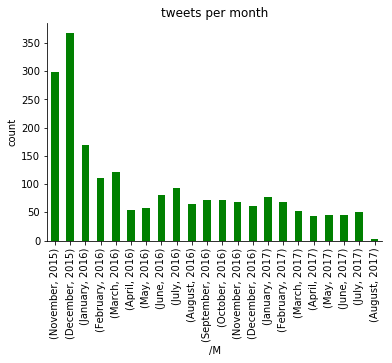

In [229]:
fig, ax = plt.subplots()
tweets_per_month.plot(kind='bar', color='g')
#tweets_per_month.plot(kind='line', color='r')
ax.set_title('tweets per month')
ax.set_ylabel('count')
ax.set_xlabel('/M')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

### 2. favorite_count &	retweet_count

In [230]:
ratio = twitter_archive_master['favorite_count'] / twitter_archive_master['retweet_count']

In [231]:
ratio.describe()

count    2073.000000
mean        3.236245
std         1.308540
min         0.000000
25%         2.486004
50%         3.148541
75%         3.890883
max        12.024368
dtype: float64

In [232]:
twitter_archive_master['favorite_count'].corr(twitter_archive_master['retweet_count'])

0.80698364190817873

> 从中位数和平均数看，大约3.2次点赞会转发一次, 相关性很高

### 3. 

In [238]:
tweets_p1_month = twitter_archive_master.loc[:, ['Month', 'Year', 'Frist_pred_conf']]

In [244]:
tweets_p1_month['M_Y'] = tweets_p1_month.loc[:, 'Month'].astype(str) + '-' + tweets_p1_month.loc[:, 'Year'].astype(str)

In [247]:
tweets_p1_month = tweets_p1_month.drop(['Month', 'Year'], axis=1)
tweets_p1_month.head()

,Frist_pred_conf,M_Y
0,0.097049,August-2017
1,0.323581,August-2017
2,0.716012,July-2017
3,0.170278,July-2017
4,0.555712,July-2017


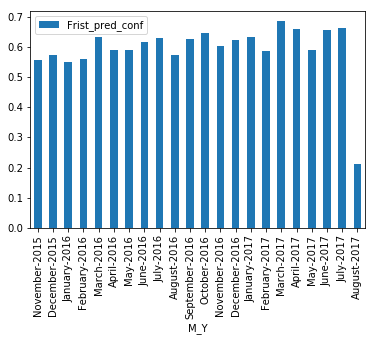

In [266]:
tweets_p1_month.groupby('M_Y', sort=False).mean()[::-1].plot(kind='bar')

In [267]:
## 看来上线后正确率没有明显提高趋势， 没有更新参数或者说2000个tweet图片对训练并没有明显提高

In [269]:
## 如何给狗狗取名字呢，先看看大家喜欢去什么名字
twitter_archive_master['dog_name'].value_counts()

None        577
a            54
Charlie      11
Cooper       10
Tucker       10
Oliver       10
Lucy         10
Penny        10
Sadie         8
Bo            8
Lola          8
Winston       8
Daisy         7
Toby          7
Jax           6
Milo          6
Rusty         6
Scout         6
Stanley       6
Koda          6
Bella         6
Bailey        6
an            6
Dave          6
Alfie         5
Leo           5
the           5
Chester       5
Larry         5
Buddy         5
           ... 
Akumi         1
Flash         1
Yoda          1
Travis        1
Taz           1
Kloey         1
Geno          1
Carper        1
Ike           1
Einstein      1
Monster       1
Obi           1
Sweet         1
Danny         1
Tyrone        1
Ed            1
Crouton       1
Chesney       1
Tassy         1
Brownie       1
Bobby         1
Hermione      1
Kona          1
Ricky         1
Pipsy         1
Kingsley      1
Barney        1
Timofy        1
Erik          1
Rupert        1
Name: dog_name, Length: 

None or a 肯定大多不是狗狗名字，看来给狗狗取名还是很随便的，没有趋势和潮流的